In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import matplotlib
matplotlib.font_manager._rebuild()
plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list

In [2]:
import sys
sys.path.append("/notebooks/nb_IEEE/opmap/")

In [3]:
import opmap
from opmap.rawCam import RawCam
from opmap.vmemMap import VmemMap
from opmap.apdMap import APDMap
from opmap.phaseMapHilbert import PhaseMapHilbert as PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap

In [4]:
def FFT(vmem_1d, N, dt, fc_low=None, fc_high=None):
    fq = np.linspace(0, 1.0/dt, N)
    F = np.fft.fft(vmem_1d)
    if fc_low is not None:
        F[(fq <= fc_low)] = 0
    if fc_high is not None:
        F[(fq >= fc_high)] = 0
    
    F_abs = np.abs(F)
    F_abs_amp = F_abs/N
#     F_abs_amp[0] = F_abs_amp[0]/2
    F_abs_amp[0] = 0
    
    F_ifft = np.fft.ifft(F)
    F_ifft_real = F_ifft.real * 2
    
    return F_ifft_real

In [5]:
def isochronal(pmap, threshold):
    contour = np.zeros_like(pmap.data)

    for i in range(contour.shape[1]):
        for j in range(contour.shape[2]):        
            if pmap.roi[i,j] == 1:
                counter = 0
                for time in range(contour.shape[0]):
                    if time == 0:
                        pass
                    elif ((pmap.data[time-1, i, j] < threshold) * (pmap.data[time, i, j] > threshold)) == 1:
                        counter = 0

                    contour[time, i, j] = counter
                    counter += 1
                
    return contour

## 旋回興奮に対する冷却

In [6]:
import cv2

### 20181121-1/C001H001S0008

In [44]:
parent_path = '/mnt/Jalife/ExperimentData/'

data_path = os.path.join(parent_path, '20181121-1/C001H001S0008/')
print(data_path)
start = 29000
end = 30000
date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_parent = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', '%s/%s/%s-%s' % (date, session_name, start, end))

raw = RawCam(path=data_path, cam_type='sa4',
          image_width=256, image_height=256, frame_start=start, frame_end=end)

vmem = VmemMap(raw)

roi_png = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/20181121-1/C001H001S0007/roi.png', cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=2)

/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/


In [71]:
num = 890
img = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0008/29000-30000/jet/pmap/%s.png'%'{0:04d}'.format(num), )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img[59:61,29:31] = 0
img[49:51,44:46] = 0
img[39:41,59:61] = 0
img[29:31,74:76] = 0
img[19:21,89:91] = 0
plt.imsave('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0008/29000-30000/vmem_point.png', img)

In [38]:
def normilize(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

In [70]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.3) 

plt.subplot(5,1,1)
plt.plot(normilize(vmem.data[650:, 120, 60]))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,2)
plt.plot(normilize(vmem.data[650:, 100, 90]))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,3)
plt.plot(normilize(vmem.data[650:, 80, 120]))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,4)
plt.plot(normilize(vmem.data[650:, 60, 150]))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,5)
plt.plot(normilize(vmem.data[650:, 40, 180]))
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.savefig('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0008/29000-30000/vmem_comp.png', dpi=300, transparent=True)
plt.close()

### 20181220-1/C001H001S0012

In [304]:
parent_path = '/mnt/Jalife/ExperimentData/'

data_path = os.path.join(parent_path, '20181220-1/C001H001S0012/')
print(data_path)
start = 10000
end = 10500
date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_parent = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', '%s/%s/%s-%s' % (date, session_name, start, end))

raw = RawCam(path=data_path, cam_type='sa4',
          image_width=256, image_height=256, frame_start=start, frame_end=end)

vmem = VmemMap(raw)

roi_png = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/20181220-1/C001H001S0012/roi.png', cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)
vmem.smooth(size=3)

/mnt/Jalife/ExperimentData/20181220-1/C001H001S0012/


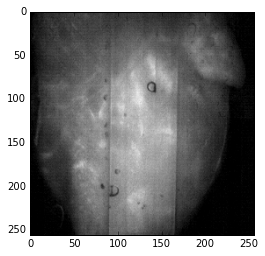

In [155]:
raw.showFrame(0)

In [229]:
angle = 288
x_0 = 41
y_0 = 61
x = 61
y = 54

print(x_0 + np.cos(angle/180*np.pi)*(x-x_0)-np.sin(angle/180*np.pi)*(y-y_0))
print(y_0 + np.sin(angle/180*np.pi)*(x-x_0)+np.cos(angle/180*np.pi)*(y-y_0))

40.5229442734
39.8157507135


In [300]:
num = 790
img = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181220-1/C001H001S0012/9500-10500/jet/pmap/%s.png'%'{0:04d}'.format(num), )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#中心
# img[59:63,39:43] = 0

img[76:80,52:56] = 255
img[76:80,27:31] = 255
img[53:57,19:23] = 255
img[38:42,39:43] = 255
img[52:56,59:63] = 255

# img[22:24,70:72] = 0
# img[41:43,73:75] = 0
# img[52:54,57:59] = 0
# img[44:46,40:42] = 0
# img[25:27,37:39] = 0
# img[14:16,53:55] = 0

plt.imsave('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181220-1/C001H001S0012/9500-10500/jet/vmem_%s.png'%num, img)

In [313]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.3) 

plt.subplot(5,1,1)
# plt.plot(normilize(vmem.data[845:915, 156, 108]))
plt.plot(normilize(vmem.data[250:, 156, 108]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,2)
# plt.plot(normilize(vmem.data[845:915, 156, 58]))
plt.plot(normilize(vmem.data[250:, 156, 58]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,3)
# plt.plot(normilize(vmem.data[845:915, 110, 42]))
plt.plot(normilize(vmem.data[250:, 110, 42]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,4)
# plt.plot(normilize(vmem.data[845:915, 80, 82]))
plt.plot(normilize(vmem.data[250:, 80, 82]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.xticks([0, 10, 20, 30, 40, 50, 60], [850, 860, 870, 880, 890, 900, 910])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,5)
# plt.plot(normilize(vmem.data[845:915, 108, 122]))
plt.plot(normilize(vmem.data[250:, 108, 122]))
# plt.xlim([0, 70])
plt.xticks([0, 50, 100, 150, 200, 250], [20.5, 20.6, 20.7, 20.8, 20.9, 21.0], size=20)
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.savefig('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181220-1/C001H001S0012/9500-10500/jet/vmem_comp.png', dpi=300, transparent=True)
plt.close()